## Build ML Models

This is the step 3 of the project

In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

### Read data from csv file

In [2]:
df = pd.read_csv("data/home_value_calc.csv")
df.head()

,Zipcode,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,Poverty Rate,Unemployment,Unemployment rate,pop_arc/eng,pop_stem,pop_tech,pop_biz,house_age,Land-Sq-Mi,Population Density
0,1001,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,8.391207,479.0,2.749240,149,411,240,461,50,11.442,1522.723300
1,1002,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,27.864531,1271.0,4.240908,219,984,309,480,48,55.043,544.483404
2,1005,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,4.399388,153.0,2.926549,104,139,19,89,48,44.242,118.168256
3,1007,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,9.470715,543.0,3.647233,147,402,184,441,37,52.643,282.810630
4,1008,1194.0,48.5,67250.0,235000.0,34505.0,97.0,164.0,831.0,49.0,4.103853,63.0,5.276382,30,54,20,14,56,53.796,22.194959


In [3]:
df.count()

Zipcode               26766
Population            26766
Median Age            26766
Household Income      26766
median_home_value     26766
Per Capita Income     26766
Masters holders       26766
Bachelor holders      26766
Median gross rent     26766
Poverty Count         26766
Poverty Rate          26766
Unemployment          26766
Unemployment rate     26766
pop_arc/eng           26766
pop_stem              26766
pop_tech              26766
pop_biz               26766
house_age             26766
Land-Sq-Mi            26766
Population Density    26766
dtype: int64

### Features Correlation Analysis

In [4]:
df.drop(columns=['Zipcode'], inplace=True)

In [5]:
df.columns

Index(['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Bachelor holders',
       'Median gross rent', 'Poverty Count', 'Poverty Rate', 'Unemployment',
       'Unemployment rate', 'pop_arc/eng', 'pop_stem', 'pop_tech', 'pop_biz',
       'house_age', 'Land-Sq-Mi', 'Population Density'],
      dtype='object')

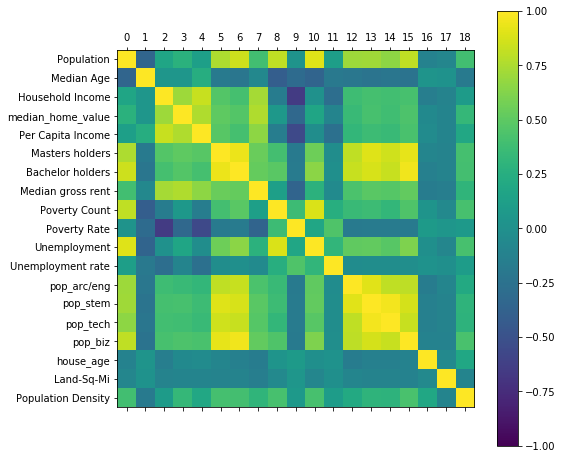

In [6]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

correlations = df.corr()

# plot correlation matrix
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

names = ['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Bachelor holders',
       'Median gross rent', 'Poverty Count', 'Poverty Rate', 'Unemployment',
       'Unemployment rate', 'pop_arc/eng', 'pop_stem', 'pop_tech', 'pop_biz',
       'house_age', 'Land-Sq-Mi', 'Population Density']
ax.set_yticklabels(names)
plt.show()

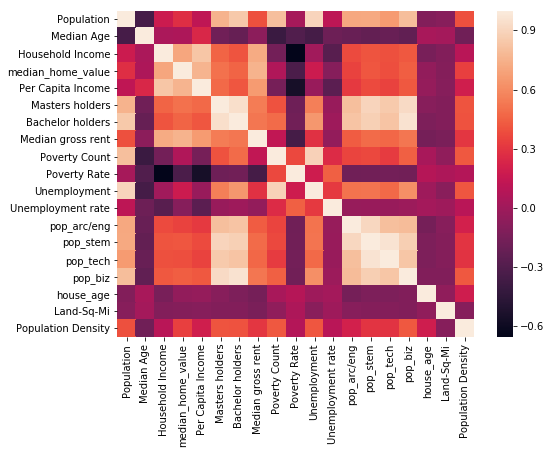

In [7]:
# Use Seaborn to draw the same correlation plot
import seaborn as sns
plt.figure(figsize=(8,6))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [8]:
# Based on the matrix, the following features are correlated, need to drop them from the data frame 
df.drop(["Poverty Count", 'pop_tech', 'Bachelor holders', 'pop_biz', 'pop_stem', 'Land-Sq-Mi' ], axis=1, inplace=True)

In [9]:
df.columns

Index(['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Median gross rent',
       'Poverty Rate', 'Unemployment', 'Unemployment rate', 'pop_arc/eng',
       'house_age', 'Population Density'],
      dtype='object')

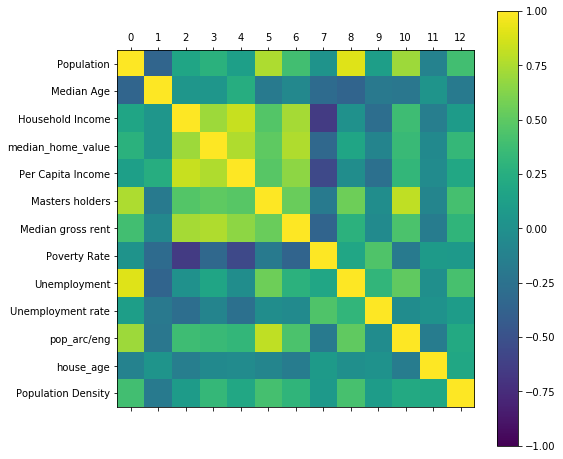

In [10]:
# Correction Matrix Plot after dropping these columns
import matplotlib.pyplot as plt
import pandas
import numpy

correlations = df.corr()

# plot correlation matrix
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

names = ['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Median gross rent',
       'Poverty Rate', 'Unemployment', 'Unemployment rate', 'pop_arc/eng',
       'house_age', 'Population Density']

# ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Explore data

In [11]:
# Assign the data to X-data and y-target
# Note: SkLearn requires a two-dimensional array of values
y = df['median_home_value'].values.reshape(-1, 1)
X = df.drop('median_home_value', axis = 1)
print(X.shape, y.shape)

(26766, 12) (26766, 1)


Text(0,0.5,'Median House Value')

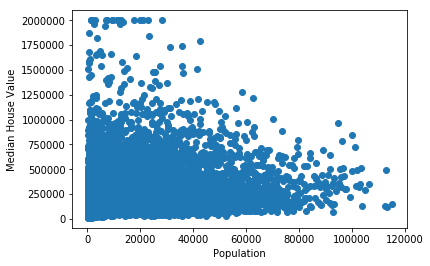

In [12]:
# Plot the data to see the relation between median house value and Population
plt.scatter(X["Population"], y)
plt.xlabel("Population")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

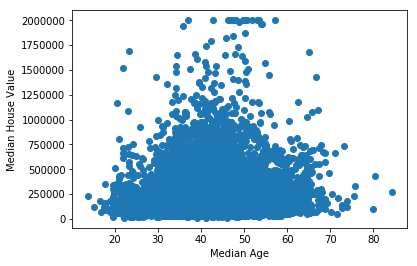

In [13]:
# Plot the data to see the relation between median house value and Median Age
plt.scatter(X["Median Age"], y)
plt.xlabel("Median Age")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

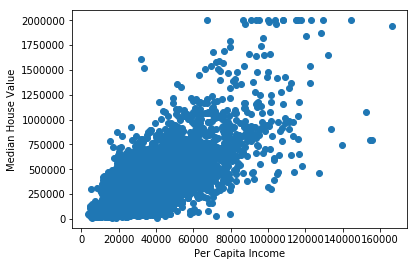

In [14]:
# Plot the data to see the relation between median house value and Per Capita Income
plt.scatter(X["Per Capita Income"], y)
plt.xlabel("Per Capita Income")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

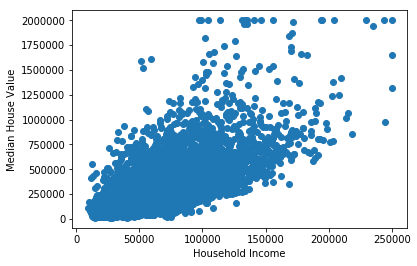

In [15]:
# Plot the data to see the relation between median house value and 'Household Income'
plt.scatter(X['Household Income'], y)
plt.xlabel('Household Income')
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

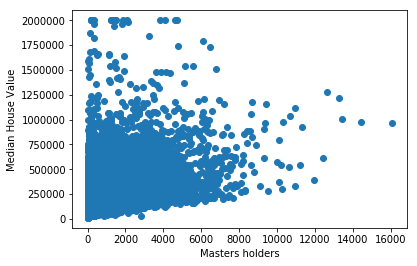

In [16]:
# Plot the data to see the relation between median house value and Masters holders
plt.scatter(X["Masters holders"], y)
plt.xlabel("Masters holders")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

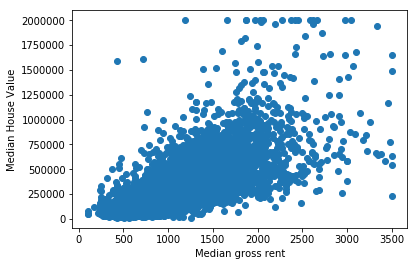

In [17]:
# Plot the data to see the relation between median house value and Median gross rent
plt.scatter(X["Median gross rent"], y)
plt.xlabel("Median gross rent")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

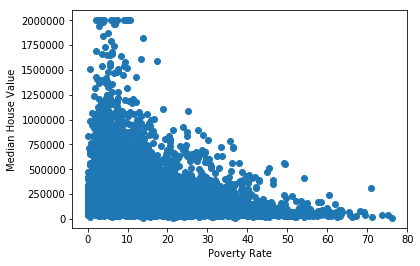

In [18]:
# Plot the data to see the relation between median house value and Poverty Rate
plt.scatter(X["Poverty Rate"], y)
plt.xlabel("Poverty Rate")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

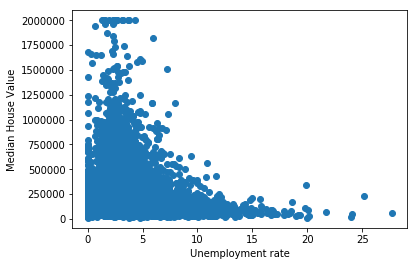

In [19]:
# Plot the data to see the relation between median house value and Unemployment rate
plt.scatter(X["Unemployment rate"], y)
plt.xlabel("Unemployment rate")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

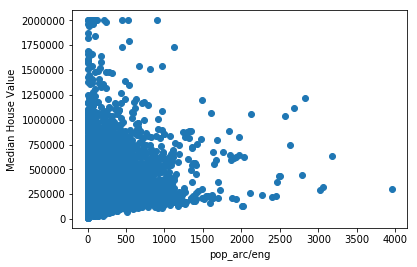

In [20]:
# Plot the data to see the relation between median house value and pop_arc/eng
plt.scatter(X["pop_arc/eng"], y)
plt.xlabel("pop_arc/eng")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

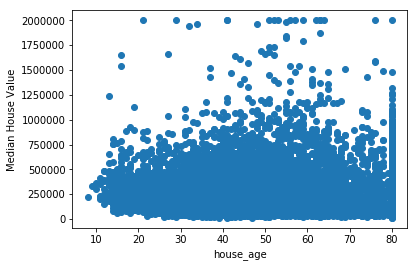

In [21]:
# Plot the data to see the relation between median house value and house_age
plt.scatter(X["house_age"], y)
plt.xlabel("house_age")
plt.ylabel("Median House Value")

Text(0,0.5,'Median House Value')

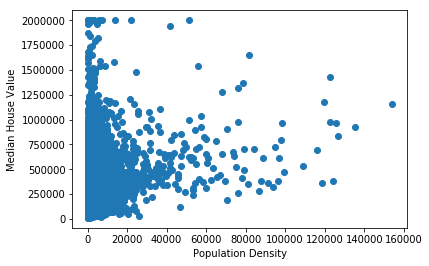

In [22]:
# Plot the data to see the relation between median house value and Population Density
plt.scatter(X["Population Density"], y)
plt.xlabel("Population Density")
plt.ylabel("Median House Value")

### Build Models Using SKLearn 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Scale Data

In [24]:
# Create imgs folder for images created
if not os.path.isdir('imgs'):
    try:
        os.makedirs('imgs')
    except OSError:
        print(f"Failed with error: {OSError}")

In [25]:
# Use sklearn's `train_test_split` to split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# Scale data with SKLearn StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#### Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with training data
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# Make prediction with test data
predictions = model.predict(X_test_scaled)

In [29]:
# Evaluate the model by Calculate the following for the test data
# 1. Calculate the mean_squared_error (mse)
# 2. the r-squared value (r2)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

# # Or by calling the `score` method on the model to show the r2 score
# model.score(X_test_scaled, y_test_scaled)

MSE: 0.27349642558613435, R2: 0.713107528407413


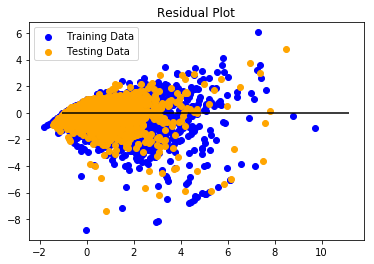

In [30]:
# Residual plot
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [31]:
# Make a predition for a given data point
X_scaled_new = [X_test_scaled[1200]]
prediction_scaled = model.predict(X_scaled_new)

# Reverse scale
prediction = y_scaler.inverse_transform(prediction_scaled)
print(f"Target: {y_test[1200][0]}, Prediction: {round(prediction[0][0], 1)}")

Target: 91800.0, Prediction: 109402.1


#### LASSO Model

In [32]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.27355818520691266, R2: 0.71304274375726


#### Ridge Model

In [33]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.273496413797559, R2: 0.7131075407734009


#### ElasticNet Model

In [34]:
# Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2731640051759117, R2: 0.7134562310015776


#### Random Forest Regression Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
import pickle # save the model

rf = RandomForestRegressor(n_estimators=300)
# Train a random forest regression model
rf = rf.fit(X_train_scaled, y_train_scaled)

predictions = rf.predict(X_test_scaled)

# save the model
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

/anaconda3/envs/MyPython36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [36]:
# R2 for training data
r2_train_data = rf.score(X_train_scaled, y_train_scaled)

# R2 for testing data
r2_test_data = rf.score(X_test_scaled, y_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
print(f"Training r2: {r2_train_data}, Testing r2: {r2_test_data}, MSE: {MSE}")

Training r2: 0.9726398410515856, Testing r2: 0.7917383380548609, MSE: 0.1985371725247291


In [37]:
importances = rf.feature_importances_
importances_list = sorted(zip(rf.feature_importances_, X.keys()), reverse=True)
importances_list

[(0.5191905206175349, 'Median gross rent'),
 (0.2514116872018661, 'Per Capita Income'),
 (0.03560255719510807, 'Population Density'),
 (0.03487316667609184, 'house_age'),
 (0.027130113324996343, 'Poverty Rate'),
 (0.026868806958836575, 'Median Age'),
 (0.026118078263473926, 'Household Income'),
 (0.019992846405830923, 'Masters holders'),
 (0.018207987977857887, 'Unemployment rate'),
 (0.01754216219475612, 'pop_arc/eng'),
 (0.012351015698091206, 'Population'),
 (0.010711057485556496, 'Unemployment')]

In [38]:
rf.score(X_test_scaled, y_test_scaled)

0.7917383380548609

In [39]:
# load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test_scaled)

# Make a prediction for a given data point
prediction_scaled = rf.predict(X_scaled_new)
prediction = y_scaler.inverse_transform(prediction_scaled)
print(f"Target: {y_test[1200][0]}, Prediction: {round(prediction[0], 1)}")

Target: 91800.0, Prediction: 108960.3


#### Decision Tree Regression Model

In [40]:
from sklearn.tree import DecisionTreeRegressor
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train_scaled, y_train_scaled)
print(clf.score(X_test_scaled, y_test_scaled))

0.5552530129941584


#### SVR Model

In [41]:
from sklearn.svm import SVR
# clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
# clf.fit(X_train_scaled, y_train_scaled)

sv = SVR(C=1.0, epsilon=0.2)
svr = sv.fit(X_train_scaled, y_train_scaled)

r2_train = svr.score(X_train_scaled, y_train_scaled)
r2_test = svr.score(X_test_scaled, y_test_scaled)

predictions = sv.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
print(f"Training r2: {r2_train_data}, Testing r2: {r2_test_data}, MSE: {MSE}")

/anaconda3/envs/MyPython36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training r2: 0.9726398410515856, Testing r2: 0.7917383380548609, MSE: 0.2265818906844381


#### Nueral Networks

In [42]:
#ignore for now- need to look into nn regression
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=40, activation='relu', input_dim=len(X.keys())))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1))

Using TensorFlow backend.


In [43]:
model.compile(optimizer='adam',
              loss='mean_squared_error',metrics=['mean_squared_error'])
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=60,verbose=2)

Epoch 1/60
 - 2s - loss: 0.2624 - mean_squared_error: 0.2624
Epoch 2/60
 - 1s - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 3/60
 - 1s - loss: 0.2057 - mean_squared_error: 0.2057
Epoch 4/60
 - 1s - loss: 0.2056 - mean_squared_error: 0.2056
Epoch 5/60
 - 1s - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 6/60
 - 1s - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 7/60
 - 1s - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 8/60
 - 1s - loss: 0.1847 - mean_squared_error: 0.1847
Epoch 9/60
 - 1s - loss: 0.1842 - mean_squared_error: 0.1842
Epoch 10/60
 - 1s - loss: 0.1815 - mean_squared_error: 0.1815
Epoch 11/60
 - 1s - loss: 0.1769 - mean_squared_error: 0.1769
Epoch 12/60
 - 1s - loss: 0.1771 - mean_squared_error: 0.1771
Epoch 13/60
 - 1s - loss: 0.1724 - mean_squared_error: 0.1724
Epoch 14/60
 - 1s - loss: 0.1722 - mean_squared_error: 0.1722
Epoch 15/60
 - 1s - loss: 0.1693 - mean_squared_error: 0.1693
Epoch 16/60
 - 1s - loss: 0.1664 - mean_squared_error: 0.1664
Epoch 17/60
 - 1s

In [44]:
preneural = model.predict(X_test_scaled)

In [45]:
# preneural[1200]
# prediction = y_scaler.inverse_transform(preneural[1200])
# prediction

array([108778.47], dtype=float32)

In [46]:
score = model.evaluate(X_test_scaled, y_test_scaled )
MSE = mean_squared_error(y_test_scaled, preneural)
print(f"score: {score}")
print(f"MSE: {MSE}")

6692/6692 [==============================] - 0s 24us/step
score: [0.20014190478322752, 0.20014190478322752]
MSE: 0.2001419061317881


In [47]:
# Make a prediction for a given data point
prediction = y_scaler.inverse_transform(preneural[1200])
print(f"Target: {y_test[1200][0]}, Prediction: {prediction}")

Target: 91800.0, Prediction: [108778.47]


### Visual Comparision of the Predictions by Different Models

* Random Forest
* Neural Network
* Linear Regration

In [49]:
if not os.path.isdir('imgs'):
    try:
        os.makedirs('imgs')
    except OSError:
        print(f"Failed with error: {OSError}")

In [50]:
actual = y_scaler.inverse_transform(y_test_scaled)
lrpredict = y_scaler.inverse_transform(predictions)
rfpredict = y_scaler.inverse_transform(rf.predict(X_test_scaled))
preneural=y_scaler.inverse_transform(preneural)
df = pd.DataFrame()
df['RF']= rfpredict
df['Actual'] = actual
df["Neural"] = preneural
df["Linear"] = lrpredict
df = df.round(0)

df.head(15)

,RF,Actual,Neural,Linear
0,74114.0,83400.0,75075.0,79007.0
1,317805.0,346400.0,293510.0,270587.0
2,174521.0,240500.0,164246.0,164432.0
3,115086.0,115200.0,129832.0,130977.0
4,234009.0,221200.0,202050.0,199814.0
5,89924.0,82400.0,73359.0,81965.0
6,103319.0,80000.0,104274.0,107449.0
7,162275.0,166700.0,144746.0,175630.0
8,85114.0,49600.0,86985.0,84767.0
9,175275.0,221100.0,179447.0,171769.0


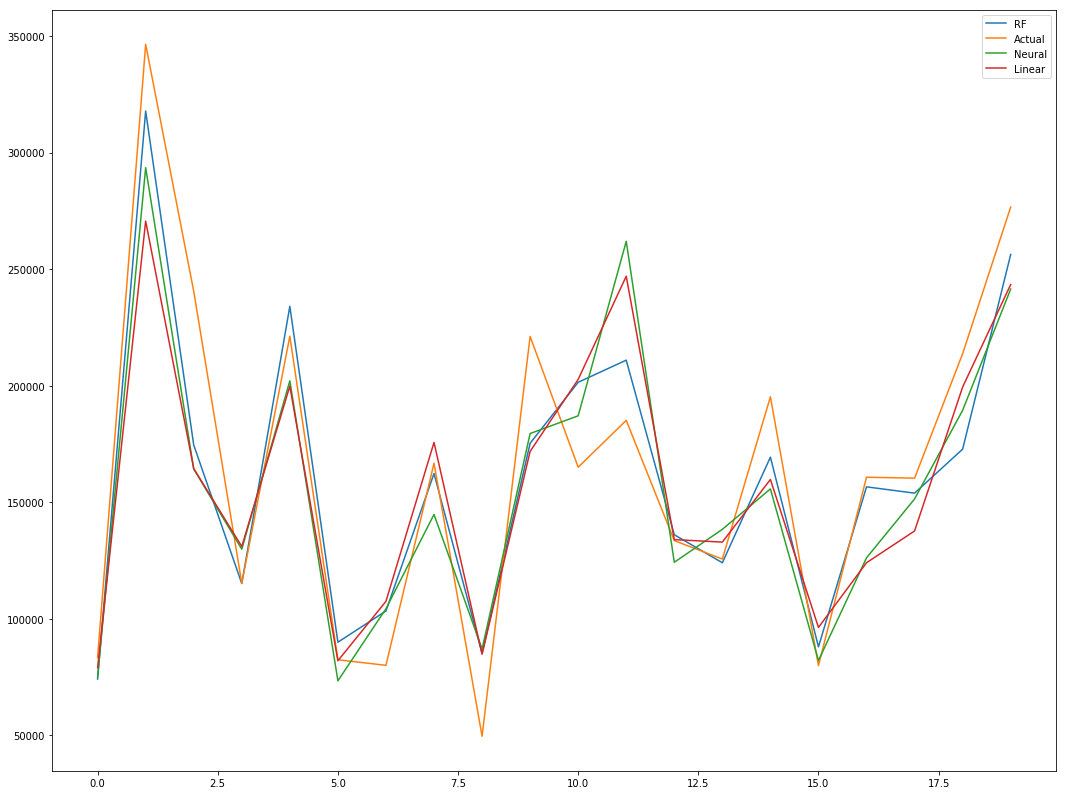

In [51]:
df[:20].plot.line(figsize=(18,14))
plt.show()

In [61]:
df.to_csv("data/model_predictions.csv", encoding="utf-8", index=False)

In [ ]:
# fig = plt.figure(figsize = (18, 8))
# plt.plot(df['Actual'][:100].tolist(),c='orange',label='Actual')
# plt.plot(df['Neural'][:100].tolist(),c='green',label='Neural')
# plt.legend()
# plt.title("Actual Home Price vs Neural predicted Home Price")
# plt.ylabel("Home Value")
# plt.grid()

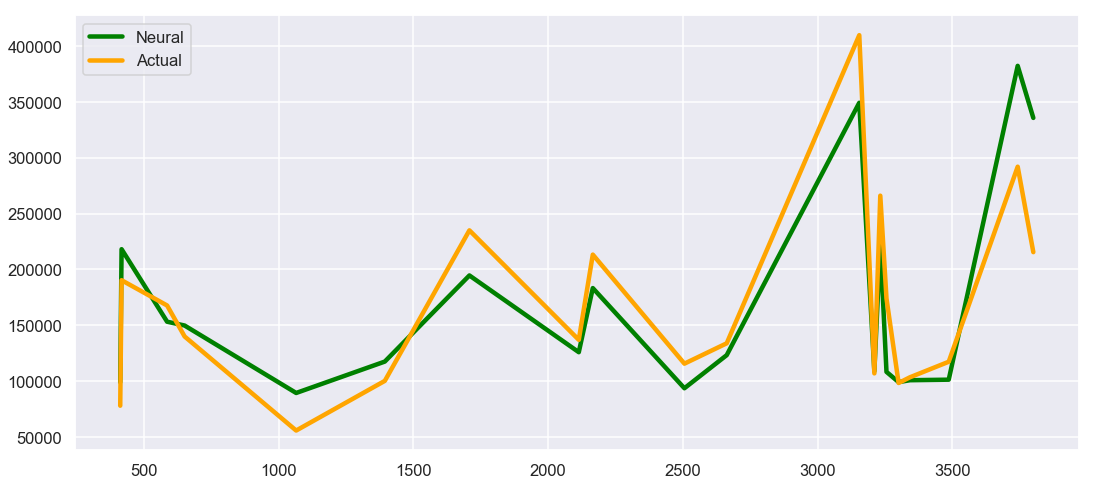

In [53]:
fig = plt.figure(figsize = (18, 8))
sns.set(style='darkgrid')
sns.set_context("talk",rc={"lines.linewidth":4.5})
linear_seg = df[:4000].sample(n=20,random_state=5)
sns.lineplot(data=linear_seg['Neural'],style='event',color='green',hue="region",label='Neural')
sns.lineplot(data=linear_seg['Actual'],style='event',color='orange',hue="region",label='Actual')
plt.savefig("imgs/neural_network.png",bbox_inches='tight')
plt.legend()

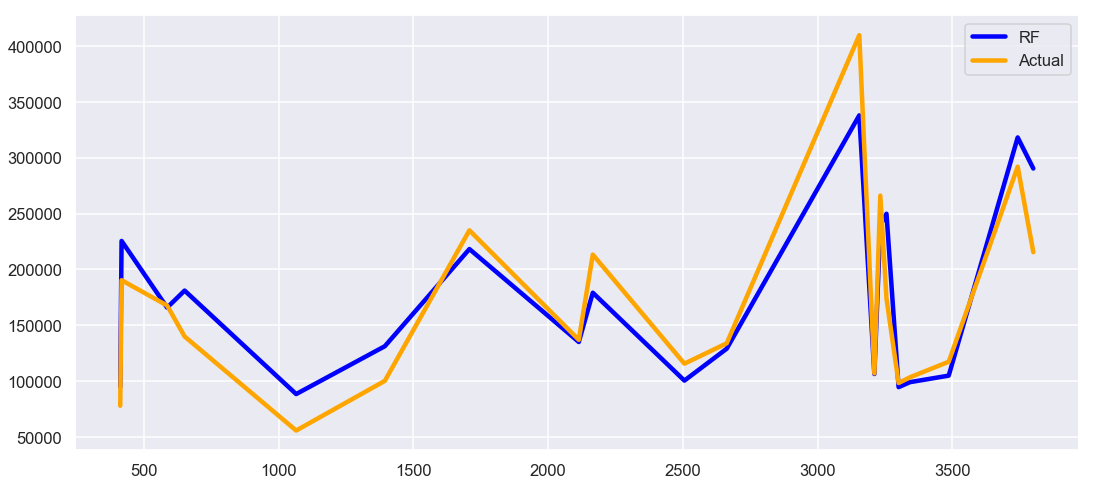

In [54]:
fig = plt.figure(figsize = (18, 8))
sns.set(style='darkgrid')
sns.set_context("talk", rc={"lines.linewidth":4.5})
sns.lineplot(data=linear_seg['RF'],style='event',color='blue',hue="region",label='RF')
sns.lineplot(data=linear_seg['Actual'],style='event',color='orange',hue="region",label='Actual')
plt.savefig("imgs/random_forest.png",bbox_inches='tight')
plt.legend()

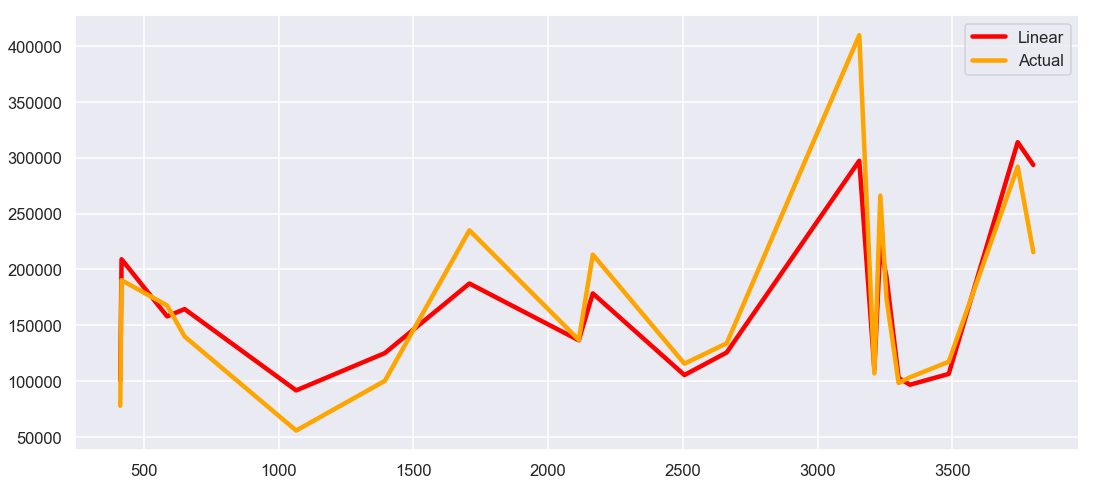

In [55]:
fig = plt.figure(figsize = (18, 8))
sns.set(style='darkgrid')
sns.set_context("talk",rc={"lines.linewidth":4.5})
sns.lineplot(data=linear_seg['Linear'],style='event',color="red",hue="region",label='Linear')
sns.lineplot(data=linear_seg['Actual'],style='event',color="orange",hue="region",label='Actual')
plt.savefig("imgs/linear.png", bbox_inches='tight')
plt.legend()

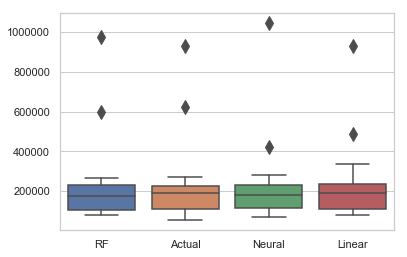

In [56]:
sns.set(style='whitegrid')
boxes = sns.boxplot(data=df[:200].sample(n=20,random_state=1),fliersize=10)

In [59]:
saver = boxes.get_figure()
saver.savefig("imgs/models_box_plot.png")

/anaconda3/envs/MyPython36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


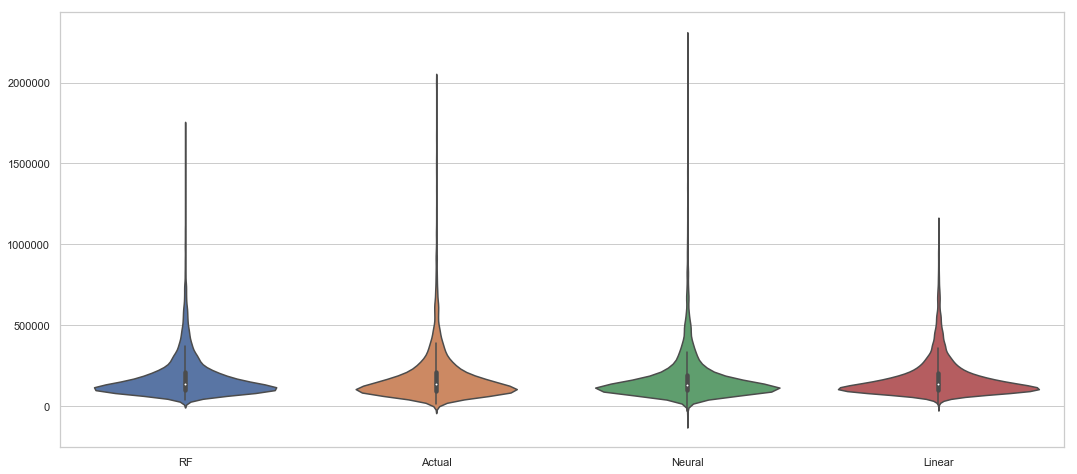

In [60]:
fig = plt.figure(figsize = (18, 8))
violins = sns.violinplot(data=df)

In [58]:
saver = violins.get_figure()
saver.savefig("imgs/models_violin_plot.png")

### Note: 

Overall, Random Forest model gives the best prediction. 